In [1]:
import pandas as pd
import numpy as np

In [2]:
training_data= pd.read_csv(r"C:\Users\SUBINOY\Documents\train_dataset.csv")
testing_data= pd.read_csv('C:\\Users\\SUBINOY\\Documents\\test_data.csv')

In [3]:
training_data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [4]:
training_data.isnull().sum()

x    0
y    1
dtype: int64

In [5]:
training_data= training_data.dropna(axis=0)

In [6]:
testing_data.head(10)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
5,15,9.805235
6,62,58.874659
7,95,97.617937
8,20,18.395127
9,5,8.746748


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
model= LinearRegression()

<Axes: xlabel='x', ylabel='Count'>

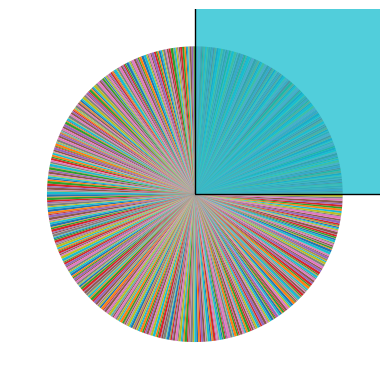

In [8]:
plt.pie(training_data['x'])
sns.histplot(x= testing_data['x'])

In [9]:
x_train= training_data['x']
y_train= training_data.drop('x', axis=1)

x_test= testing_data['x']
y_test= testing_data.drop('x', axis=1)

C:\Users\SUBINOY\AppData\Local\Temp\ipykernel_1944\1787830683.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=training_data['x'], kde=True)


<Axes: ylabel='Density'>

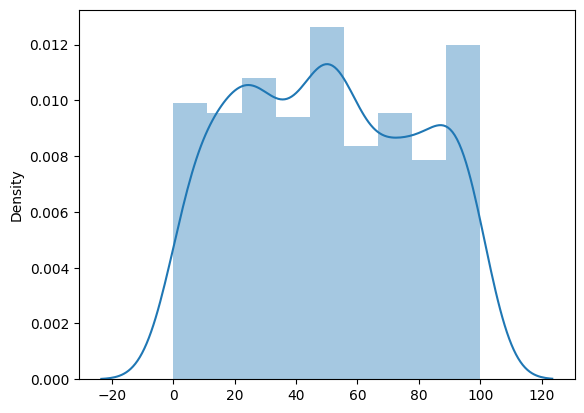

In [21]:
sns.distplot(x=training_data['x'], kde=True)

Text(0, 0.5, 'Y -->')

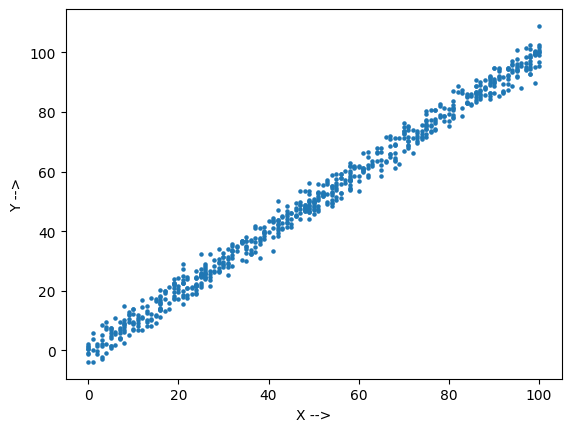

In [10]:
plt.scatter(x_train, y_train, s=5)
plt.xlabel('X -->')
plt.ylabel('Y -->')

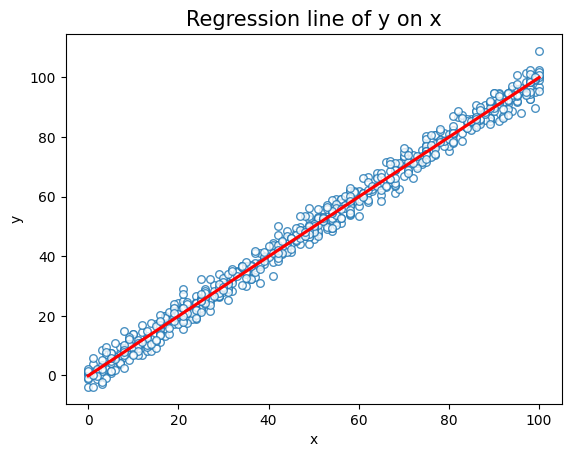

In [24]:
chart= sns.regplot(x= x_train, y= y_train, scatter_kws={'s':30, 'facecolor':'white'}, line_kws={'color':'red'})
chart.set_title("Regression line of y on x", fontdict={'size':15})
plt.show()

In [12]:
model.fit(y_train, x_train)

LinearRegression()

In [13]:
m= model.intercept_
c= model.coef_
m,c

(0.5712547832981514, array([0.99005168]))

Regression Equation: y= 0.5712547832981514 + 0.99005168x

In [14]:
y_hat= model.predict(y_test)

In [15]:
y_test.shape

(300, 1)

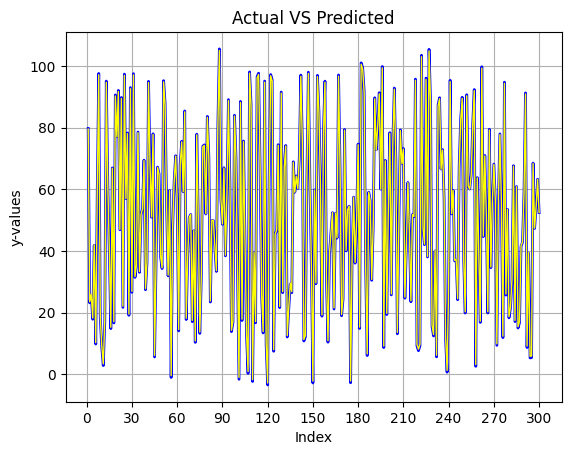

In [16]:
index= [i for i in range(1,301)]
plt.plot(index,y_test , color="blue" , linewidth=2, linestyle='-')
plt.plot(index,y_hat , color="yellow", linewidth=1, linestyle='-')

plt.title('Actual VS Predicted')
plt.xlabel('Index')
plt.ylabel('y-values')

plt.xticks(np.arange(0,330, step=30))
plt.yticks(np.arange(0,120, step=20))
plt.grid()

In [17]:
from sklearn import metrics

In [18]:
print("MSE= ", metrics.mean_squared_error(y_hat, y_test))
print("R^2= ", metrics.r2_score(y_hat, y_test))

MSE=  0.08719048744399262
R^2=  0.999894398732066


Looking at the values of MSE and R^2, we conclude that our trained model is 99.98% accurate on test data!

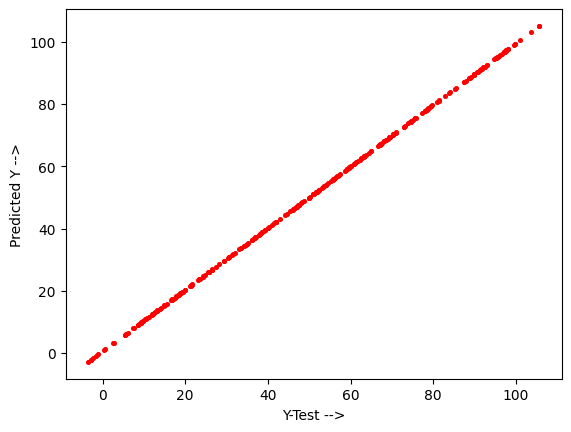

In [19]:
plt.scatter(y_test,y_hat, s=7, color='red')
plt.xlabel('Y-Test -->')
plt.ylabel('Predicted Y -->')
plt.show()